In [4]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt

In [5]:
dat_file = np.load('Introduction-to-Python-for-Data-Sciences-master/data/student.npz')
A = dat_file['A_learn']
b = dat_file['b_learn']
A_test = dat_file['A_test']
b_test = dat_file['b_test']
x0 = np.zeros(28)

In [6]:
L = max(np.linalg.eigh(A.T @ A)[0])

In [7]:
func = lambda x: 0.5 * (A @ x - b).T @ (A @ x - b)
grad = lambda x: A.T @ ( A @ x - b)
grad_i = lambda x, i : A[i] * ( A[i].T @ x - b[i])
grad_2 = lambda x: A.T @ A

In [8]:
def RMS(x0, a, b, delta, t, grad, func, v=0):
    xk = x0
    res = [func(xk)]
    for idx in range(1, t):
        g = grad(xk)
        v = b * v + (1 - b) * (g * g)

        e = delta / np.sqrt(idx)
        a_new = a / np.sqrt(idx)

        A = np.diag(np.sqrt(v)) + e * np.eye(len(v))
        xk = xk - a_new * np.linalg.inv(A) @ g
        res.append(func(xk))
    return xk, res

In [35]:
xk, res = RMS(x0, 2, 0.9, 0.0009, 10000, grad, func)

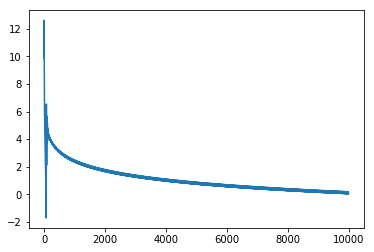

In [36]:
plt.plot(np.log(np.array(res) - 373.4040155581676))
plt.show()